_Run the first 2 code cells without modifications_

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.display import Markdown #, IFrame
# for presentations:
#display(HTML("<style>.container { width:100% !important; }</style>"))

import numpy as np
import pandas as pd
#pd.set_option("display.max_colwidth", 200)
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.ion()
plt.style.use('seaborn-v0_8-muted')
from pprint import pprint as ptp

import sys
from pathlib import Path
print('Python ver: {}\nPython env: {}'.format(sys.version, Path(sys.prefix).name))
print('Currrent dir: {}\n'.format(Path.cwd()))


def add_to_sys_path(this_path, up=False):
    """
    Prepend this_path to sys.path.
    If up=True, path refers to parent folder (1 level up).
    """

    if up:
        newp = str(Path(this_path).parent)
    else:
        newp = str(Path(this_path))
    if newp not in sys.path:
        sys.path.insert(1, newp)
        print('Path added to sys.path: {}'.format(newp))


def fdir(obj, start_with_str='_', exclude=True):
    """Filtered dir() for method discovery."""
    return [d for d in dir(obj) if not d.startswith(start_with_str) == exclude]

def despine(which=['top','right']):
    """which ([str])): 'left','top','right','bottom'."""

    ax = plt.gca()
    for side in which:
        ax.spines[side].set_visible(False)
    return

def md_width_comment(w:int=120) -> str:
    """Width guide for composing md documents."""
    return f"<!-- dotted line width = {w}\n{'.'*w}-->"


# autoreload extension
%load_ext autoreload
%autoreload 2

Python ver: 3.11.5 | packaged by conda-forge | (main, Aug 27 2023, 03:34:09) [GCC 12.3.0]
Python env: mce
Currrent dir: /home/cat/projects/MCCE_Benchmarking/notebooks



---
---

In [23]:
from mcce_benchmark import BENCH, DEFAULT_DIR, MCCE_EPS, N_ACTIVE, N_PDBS, ENTRY_POINTS, OUT_FILES, MCCE_OUTPUTS, ANALYZE_DIR
from mcce_benchmark import USER_PRFX, USER_ENV, CONDA_PATH, USER
from mcce_benchmark import Pathok
from mcce_benchmark import pkanalysis, plots

print(BENCH)
print(f"{USER_PRFX = }\n{USER_ENV = }\n{CONDA_PATH = }")


        BENCH_DATA = /home/cat/projects/MCCE_Benchmarking/mcce_benchmark/data
        BENCH_REFS = /home/cat/projects/MCCE_Benchmarking/mcce_benchmark/data/refsets
        BENCH_PARSE_E4 = /home/cat/projects/MCCE_Benchmarking/mcce_benchmark/data/refsets/parse.e4
        BENCH_DB = /home/cat/projects/MCCE_Benchmarking/mcce_benchmark/data/pkadbv1
        BENCH_WT = /home/cat/projects/MCCE_Benchmarking/mcce_benchmark/data/pkadbv1/WT_pkas.csv
        BENCH_PROTS = /home/cat/projects/MCCE_Benchmarking/mcce_benchmark/data/pkadbv1/proteins.tsv
        BENCH_PDBS = /home/cat/projects/MCCE_Benchmarking/mcce_benchmark/data/pkadbv1/clean_pdbs
        DEFAULT_JOB = default_run
        DEFAULT_JOB_SH = /home/cat/projects/MCCE_Benchmarking/mcce_benchmark/data/pkadbv1/clean_pdbs/default_run.sh
        BENCH_Q_BOOK = /home/cat/projects/MCCE_Benchmarking/mcce_benchmark/data/pkadbv1/clean_pdbs/book.txt
        CLEAN_PDBS = clean_pdbs
        Q_BOOK = book.txt
        
USER_PRFX = '/home/cat/miniconda3/

---
# Define `benchmarks_dir`


In [38]:
# To run analysis on ref set 1

benchmarks_dir = Pathok(Path.cwd().parent.parent.joinpath(DEFAULT_DIR))
print(f"{benchmarks_dir = }")

pdbs = Pathok(benchmarks_dir.joinpath(BENCH.CLEAN_PDBS))
print(f"{pdbs = }")
book_fp = pdbs.joinpath(BENCH.Q_BOOK)
analyze = benchmarks_dir.joinpath(ANALYZE_DIR)
if not analyze.exists():
    analyze.mkdir()

benchmarks_dir = PosixPath('/home/cat/projects/mcce_benchmarks')
pdbs = PosixPath('/home/cat/projects/mcce_benchmarks/clean_pdbs')


# 0. Check pct completed threshold

In [27]:
# OK to analyze?
min_pct_complete = 1 # default

pct = pkanalysis.pct_completed(book_fp)
if pct < min_pct_complete:
    print(f"Completion threshold not met; completed = {pct:.2f}")

# 1. First step in analysis : Create the all pks file:

In [29]:
pkanalysis.collate_all_pkas(benchmarks_dir)

[INFO]: root, collate_all_pkas:
	Created 'all_pkas.out'; Can be loaded using pkanalysis.all_pkas_df(benchmarks_dir).


### Q: can a all_pkas.out be loaded into df? YES!!

## Other way to load a pkout file into a df: pkanalysis.pkout_df(pko_fp:str, collated:bool=False) 

## Filtering allout_df

# 3. Get expt'l pkas and current job pkas dicts:

In [36]:
expl_d = pkanalysis.experimental_pkas_to_dict()
len(expl_d)
jobpk_d = pkanalysis.job_pkas_to_dict(book_fp)
len(jobpk_d)

1214

4839

# 4. Get matched pkas & save to file

In [39]:
matched_pKas = pkanalysis.match_pkas(expl_d, jobpk_d)
pkanalysis.matched_pkas_to_csv(benchmarks_dir, matched_pKas)

In [40]:
matched_pKas[:3]

[('135L/ASP-A0018_', 2.68, 0.92),
 ('135L/GLU-A0035_', 6.06, 5.533),
 ('135L/GLU-A0007_', 2.68, 2.886)]

# 5. Get the pka stats dict:
d_stats = pkanalysis.matched_pkas_stats(matched_fp)

```
d_stats = {"fit":(m, b),
        "N":N,
        "mean_delta": mean_delta,
        "rmsd":rmsd,
        "bounds":comp_bounds, # = [3., 2., 1.]
        "text":pkas_stats}.
```

In [48]:
matched_fp = benchmarks_dir.joinpath(ANALYZE_DIR, OUT_FILES.MATCHED_PKAS_FILE.value)

matched_df = pkanalysis.load_matched_pkas(matched_fp)
matched_df.head()

,resid,expl,mcce
0,ASP-A0018_,2.68,0.920
1,GLU-A0035_,6.06,5.533
2,GLU-A0007_,2.68,2.886
3,ASP-A0119_,3.35,3.069
4,ASP-A0087_,2.13,2.552


In [42]:
d_stats = pkanalysis.matched_pkas_stats(matched_df, prec=2)
print(d_stats["txt"])

Residues stats:
Number of pKas matched with those in pKaDB: 1,028
Fit line: y = 0.96.x + 0.09
Mean delta pKa: 1.06
RMSD, calculated vs exprimental: 1.71
Proportion within 3.0 pH units: 94.55%
Proportion within 2.0 pH units: 88.13%
Proportion within 1.0 pH units: 64.88%



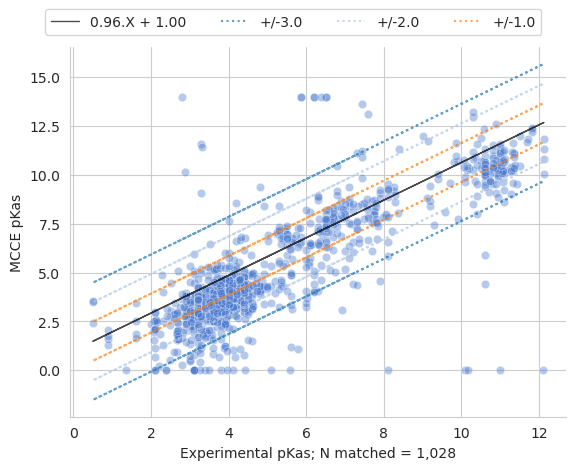

In [50]:
save_to = analyze.joinpath("pkas_fit")

plots.plot_pkas_fit(matched_df, d_stats, save_to)

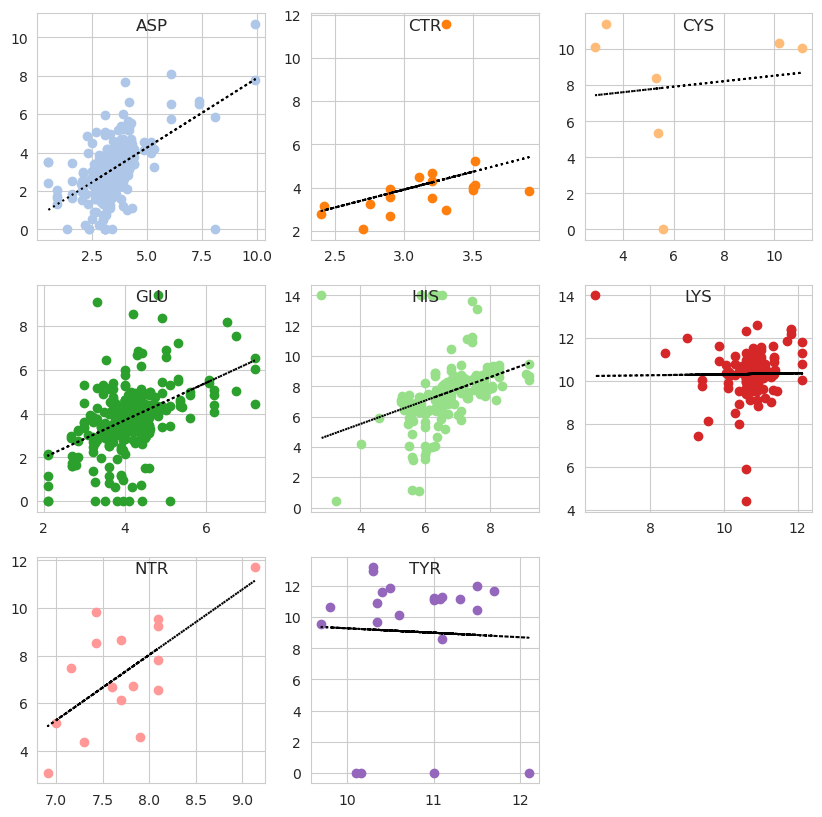

In [55]:
save_to = analyze.joinpath("res_analysis")

plots.plot_res_analysis(matched_pKas, save_to)

In [52]:
txt, df = pkanalysis.res_outlier_count(matched_fp)
df
# OR:
#print(txt)

,Delta over 3,Out of bounds
ASP,11,10
CTR,1,0
CYS,4,1
GLU,15,9
HIS,15,7
LYS,4,1
NTR,2,0
TYR,4,4


In [53]:
pkanalysis.confs_throughput_to_tsv(pdbs, overwrite=True)

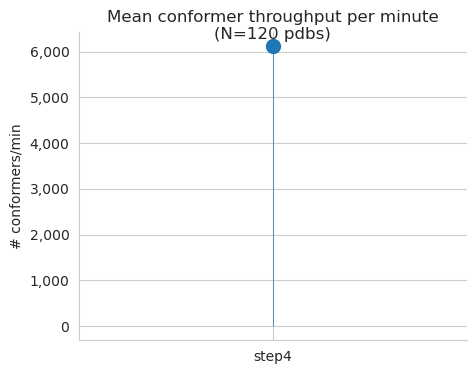

In [54]:
tsv = analyze.joinpath(OUT_FILES.CONFS_THRUPUT.value)
png = tsv.parent.joinpath(OUT_FILES.CONFS_TP_PNG.value)
tput_df = pkanalysis.load_tsv(tsv, index_col="step")

plots.plot_conf_thrup(tput_df, png)



![Conformers throughput](./conf_thruput.png "Conformers throughput")

---
---
# Cli testing

In [15]:
cli_parser = pkanalysis.analyze_parser()
cli_parser.print_usage()

usage: 
bench_analyze <+ sub-command :: one of [expl_pkas]> <related args>

PURPOSE: Collate all pK.out files into one in <benchmarks_dir>;
         Create all necessary files and pictures for report building
         in <benchmarks_dir>/analysis/.

Examples for current implementation (Beta):
 - Using defaults (benchmarks_dir=mcce_benchmarks, min_pct_complete=100):
   >bench_analyze expl_pkas

 - Using non-default values:
   >bench_analyze expl_pkas -benchmarks_dir <different name> -min_pct_complete 0.9


[INFO]: root, expl_pka_comparison:
	Collating all completed pK.out files.
[INFO]: root, collate_all_pkas:
	Created 'all_pkas.out'; Can be loaded using pkanalysis.all_pkas_df(benchmarks_dir).
[INFO]: root, expl_pka_comparison:
	Calculating conformers and residues counts into csv files.
[INFO]: root, expl_pka_comparison:
	Calculating conformers thoughput into csv files.
[INFO]: root, expl_pka_comparison:
	Loading the experimental and calculated pKas to dict.
[INFO]: root, expl_pka_comparison:
	Matching the pkas and saving list to csv file.
[INFO]: root, expl_pka_comparison:
	Calculating the matched pkas stats into dict.
[INFO]: root, expl_pka_comparison:
	Plotting conformers throughput per step + pic.


     Delta over 3  Out of bounds
res                             
ASP            11             10
CTR             1              0
CYS             4              1
GLU            15              9
HIS            15              7
LYS             4              1
NTR             2              0
TYR             4              4


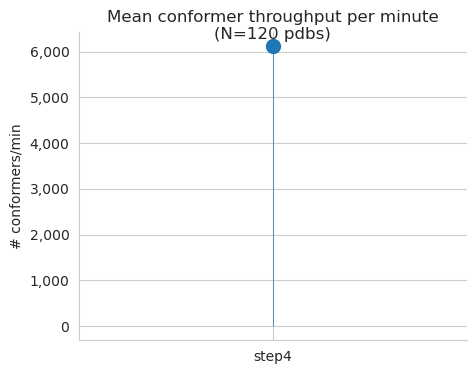

[INFO]: root, expl_pka_comparison:
	Plotting pkas fit + pic.


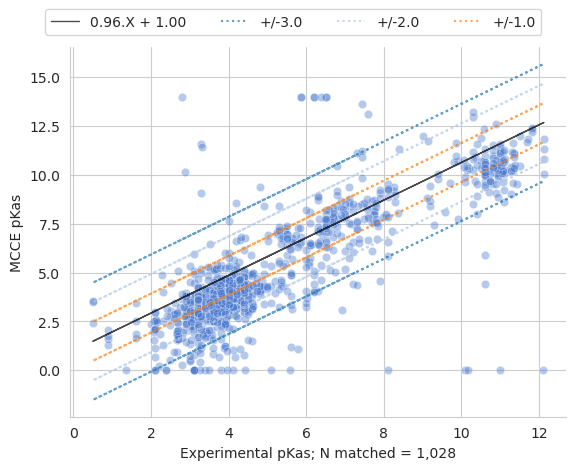

[INFO]: root, expl_pka_comparison:
	Plotting residues analysis + pic.


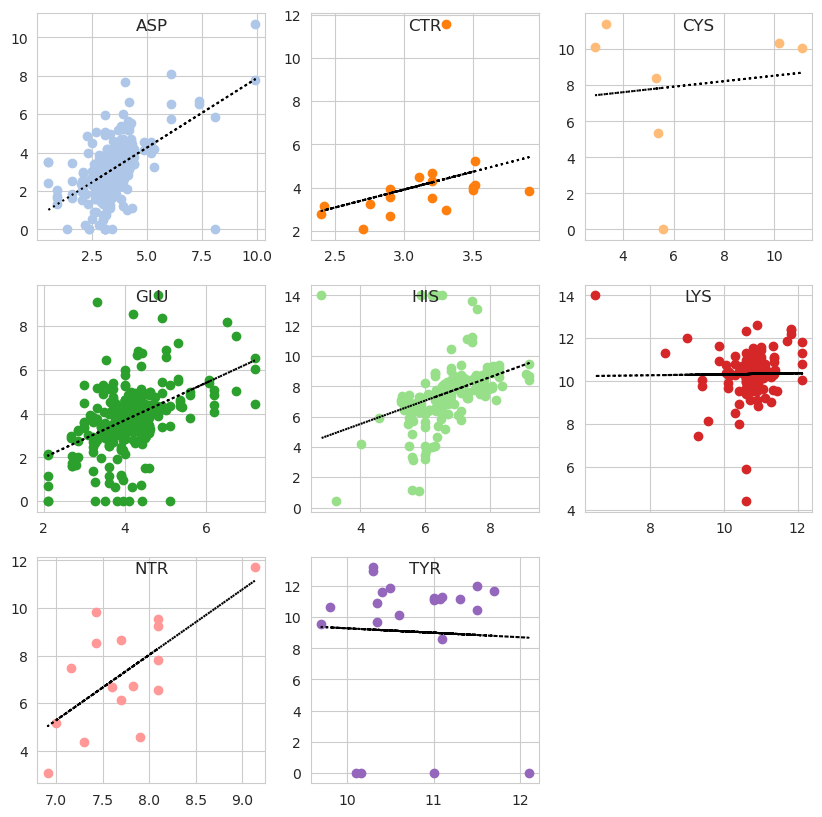

In [16]:
cmd = f"expl_pkas -benchmarks_dir {benchmarks_dir}"
pkanalysis.analyze_cli(cmd.split())

---
---
---